# Bruno Borguesan - Análise de Sentimentos?

OBJETIVO:
    - Utilizando os arquivos: "imdb_labelled.txt", "amazon_cells_labelled.txt", "yelp_labelled.txt", "Youtube01-Psy.csv", "Youtube04-Eminem" e "Youtube05-Shakira" criar uma solução baseada em inteligencia artificial para realizar análise de sentimentos, classificando os comentários como Positivo, Negativo e Neutro;
    - Apresentar a taxa de acerto do modelo, Verdadeiro Positivo, Verdadeiro Negativo, Falso Positivo e Falso Negativo.
    
PROCESSO REALIZADO:
    - Selecionado apenas as base de dados ".txt" pois pela análise dos dados são as unicas que tem classificação como POSITIVO e NEGATIVO. Arquivos ".csv" estão classificados como SPAM, NÃO SPAM;
    - Aplicado um preprocessamento para anlisar se os dados estão balanceados, tamanho dos textos, remoção de caracters especiais;
    - Substituição de algums dados por palavras genericas, como e-mails, telefones, paginas, numeros..., correção de aglumas palavras usando dicionario e remoção de stopwords;
    - Resultado com 3000 avaliações com 1500 positivas e 1500 negativas;
    - Feita a divisão do dataset em 70% treino e 30% teste, utilizando o NaiveBayesClassifier do NLTK a acuracia media foi proximo de 80%;
    

PROBLEMAS A SEREM RESOLVIDOS:
    - Baixa acurracia, analisar classificação inicial se esta correta;
    - Melhorar apresentação dos dados.

SOLUÇÕES POSSÍVEIS:
    - Utilizar base de dados externa para aumentar numero de avaliações;
    - Aplicar LSTM usando pytorch.

In [552]:
'''
Datasets .txt are classifeid as 1 to positive 0 to negative!
all txt files are balanced, with at least 7 characteres of comment.
0, 'nlp/amazon_cells_labelled.txt': Minimo 11, Maximo 149, Media 55.226, Total 1000 | 0 500, 1 500, Media 0.5
1, 'nlp/imdb_labelled.txt': Minimo 7, Maximo 479, Media 82.272, Total 1000| 0 500, 1 500, Media 0.5
2, 'nlp/yelp_labelled.txt': Minimo 11, Maximo 149, Media 58.316, Total 1000 | 0 500, 1 500, Media 0.5


Datasets .csv are classifeid as 1 to span 0 to not-span!
datasets 3 and 5 are not balanced, and with few caracter to analyze sentiment...
Split data between train and test (30, 70)
3, 'nlp/Youtube01-Psy.csv': Minimo 4, Maximo 1078, Media 86.88571428571429, Total 350 | 0 175, 1 175, Media 0.5
4, 'nlp/Youtube04-Eminem.csv': Minimo 3, Maximo 1013, Media 112.296875, Total 448 | 0 203, 1 245, Media 0.546875
5, 'nlp/Youtube05-Shakira.csv': Minimo 2, Maximo 1125, Media 108.92432432432433, Total 370 | 0 196, 1 174, Media 0.4702702702702703
'''
import re
import csv

from imutils import paths
import html

def remove_emojis(data):
    return data
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

path_nlps = 'D:/Virtual/TheInsight/Desafio_03/nlp/'

list_nlps = list(paths.list_files(path_nlps))

print(list_nlps)
#list_nlps=['D:/Virtual/TheInsight/Desafio_03/nlp/amazon_cells_labelled.txt']
data = []
for arq_file in list_nlps:
  print(arq_file)
  arq = open(arq_file, "r", encoding='utf-8-sig').readlines()
  if arq_file[-4:] == ".txt":
    #continue
    for line in arq:
      line_splited = line.split("\t") 
      data.append([remove_emojis(html.unescape(line_splited[-2])).replace("\ufeff","").strip(), int(line_splited[-1])])
      #print(data[-1])
  elif arq_file[-4:] == ".csv":
    continue
    with open(arq_file, "r", encoding='utf-8-sig') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for line in csv_reader:
          try:
            data.append([remove_emojis(html.unescape(line[-2])).replace("\ufeff","").strip(), int(line[-1])])
            #print(data[-1])
          except:
            print(line)
#   data_stas = []
#   for pair_classified in data:
#     data_stas.append([len(pair_classified[-2]), int(pair_classified[-1])])
#   lista_data_stats = [i[0] for i in data_stas]
#   print("Minimo {0}, Maximo {1}, Media {2}, Total {3}".format(min(lista_data_stats), max(lista_data_stats), sum(lista_data_stats)/len(data_stas), len(lista_data_stats)))
#   lista_data_stats = [i[1] for i in data_stas]
#   print("Count 0 {0}, Count 1 {1}, Media {2}".format(lista_data_stats.count(0), lista_data_stats.count(1), sum(lista_data_stats)/len(data_stas)))
#   print("*"*20)

['D:/Virtual/TheInsight/Desafio_03/nlp/amazon_cells_labelled.txt', 'D:/Virtual/TheInsight/Desafio_03/nlp/imdb_labelled.txt', 'D:/Virtual/TheInsight/Desafio_03/nlp/yelp_labelled.txt', 'D:/Virtual/TheInsight/Desafio_03/nlp/Youtube01-Psy.csv', 'D:/Virtual/TheInsight/Desafio_03/nlp/Youtube04-Eminem.csv', 'D:/Virtual/TheInsight/Desafio_03/nlp/Youtube05-Shakira.csv']
D:/Virtual/TheInsight/Desafio_03/nlp/amazon_cells_labelled.txt
D:/Virtual/TheInsight/Desafio_03/nlp/imdb_labelled.txt
D:/Virtual/TheInsight/Desafio_03/nlp/yelp_labelled.txt
D:/Virtual/TheInsight/Desafio_03/nlp/Youtube01-Psy.csv
D:/Virtual/TheInsight/Desafio_03/nlp/Youtube04-Eminem.csv
D:/Virtual/TheInsight/Desafio_03/nlp/Youtube05-Shakira.csv


In [553]:
len(data)

3000

In [554]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

import string

def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        #token = convert_emojis(token)
        token = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', token)
        token = re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress', token)
        token = re.sub(r'£|\$', 'money-symbol', token)
        token = re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number', token)
        token = re.sub(r'\d+(\.\d+)?', 'number', token)
        token = re.sub(r'[^\w\d\s]', ' ', token)
        token = re.sub(r'\s+', ' ', token)
        token = re.sub(r'^\s+|\s*?$', ' ', token)
        token = token.strip()

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [555]:
stop_words = stopwords.words('english')
data_text_positivo = [aux[0] for aux in data if aux[1]==1]
data_text_negativo = [aux[0] for aux in data if aux[1]==0]
positivo_cleaned_tokens_list = []
for tokens in data_text_positivo:
    positivo_cleaned_tokens_list.append(remove_noise(tokens.split(), stop_words))
negativo_cleaned_tokens_list = []
for tokens in data_text_negativo:
    negativo_cleaned_tokens_list.append(remove_noise(tokens.split(), stop_words))

In [556]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positivo_cleaned_tokens_list)

In [557]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(100))

[('great', 200), ('good', 195), ('film', 114), ('movie', 98), ('phone', 90), ('number', 88), ('love', 77), ('one', 76), ('like', 72), ('work', 65), ('it s', 64), ('place', 64), ('best', 63), ('well', 61), ('food', 60), ('time', 57), ('really', 56), ('make', 55), ('service', 54), ('excellent', 51), ('nice', 51), ('get', 49), ('go', 48), ('use', 44), ('also', 44), ('price', 42), ('recommend', 38), ('quality', 37), ('sound', 35), ('headset', 35), ('see', 35), ('product', 34), ('character', 34), ('think', 33), ('come', 31), ('i ve', 30), ('ever', 30), ('even', 29), ('pretty', 28), ('year', 27), ('would', 27), ('give', 27), ('say', 26), ('play', 26), ('case', 25), ('happy', 25), ('look', 25), ('find', 25), ('amazing', 25), ('back', 25), ('watch', 25), ('wonderful', 25), ('battery', 24), ('friendly', 24), ('everything', 23), ('every', 23), ('delicious', 23), ('definitely', 22), ('fine', 21), ('right', 21), ('still', 21), ('enjoy', 21), ('ear', 20), ('try', 20), ('i m', 20), ('awesome', 20), 

In [591]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positivo_tokens_for_model = get_tweets_for_model(positivo_cleaned_tokens_list)
negativo_tokens_for_model = get_tweets_for_model(negativo_cleaned_tokens_list)

In [592]:
import random

positivo_dataset = [(tweet_dict, "Positivo") for tweet_dict in positivo_tokens_for_model]

negativo_dataset = [(tweet_dict, "Negativo") for tweet_dict in negativo_tokens_for_model]

dataset = positivo_dataset + negativo_dataset
random.shuffle(dataset)

In [593]:
from nltk import classify, NaiveBayesClassifier

train_data = dataset[:int(len(dataset)*.7)]
test_data = dataset[int(len(dataset)*.7):]

classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

Accuracy is: 0.8011111111111111


In [594]:
print(classifier.show_most_informative_features(10))

Most Informative Features
                     bad = True           Negati : Positi =     31.3 : 1.0
                   great = True           Positi : Negati =     18.4 : 1.0
                    love = True           Positi : Negati =     16.7 : 1.0
                    nice = True           Positi : Negati =     14.6 : 1.0
                terrible = True           Negati : Positi =     13.0 : 1.0
                   price = True           Positi : Negati =     11.2 : 1.0
                   awful = True           Negati : Positi =     10.4 : 1.0
                   waste = True           Negati : Positi =     10.4 : 1.0
                   avoid = True           Negati : Positi =      9.2 : 1.0
                    fine = True           Positi : Negati =      8.8 : 1.0
None


In [595]:
custom_tweet = 'Thank you for sending my baggage to CityX and flying me to CityY at the same time. Brilliant service. #thanksGenericAirline'
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

Thank you for sending my baggage to CityX and flying me to CityY at the same time. Brilliant service. #thanksGenericAirline Positivo


In [596]:
custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

I ordered just once from TerribleCo, they screwed up, never used the app again. Negativo


In [597]:
test_result = []
gold_result = []

for i in range(len(test_data)):
    test_result.append(classifier.classify(test_data[i][0]))
    gold_result.append(test_data[i][1])

In [598]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(gold_result, test_result))
print(confusion_matrix(gold_result, test_result))

              precision    recall  f1-score   support

    Negativo       0.80      0.77      0.79       422
    Positivo       0.81      0.82      0.81       478

    accuracy                           0.80       900
   macro avg       0.80      0.80      0.80       900
weighted avg       0.80      0.80      0.80       900

[[327  95]
 [ 84 394]]


In [599]:
import wordcloud
import matplotlib.pyplot as plt

def show_wordcloud(all_pos_words, title):
    text = ' '.join(list(all_pos_words))
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

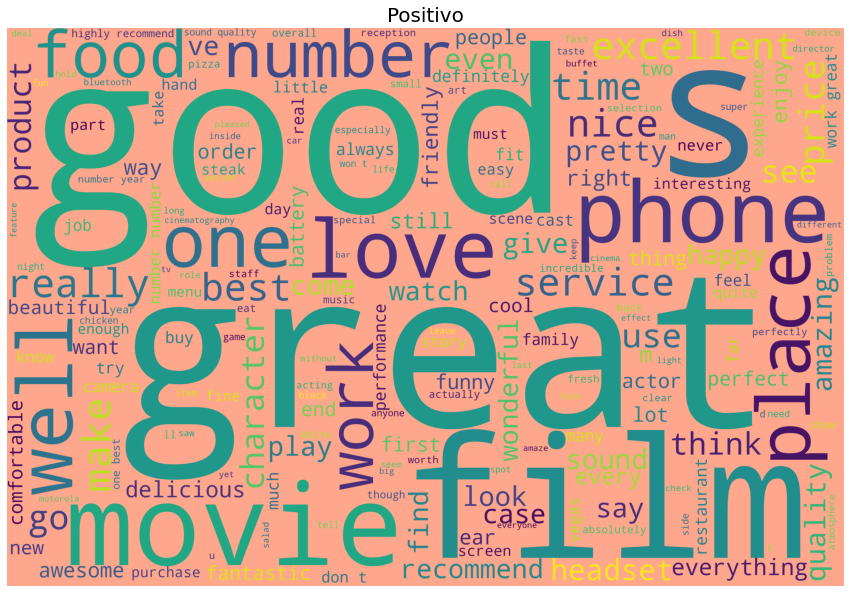

In [600]:
all_pos_words = get_all_words(positivo_cleaned_tokens_list)
show_wordcloud(all_pos_words, "Positivo")

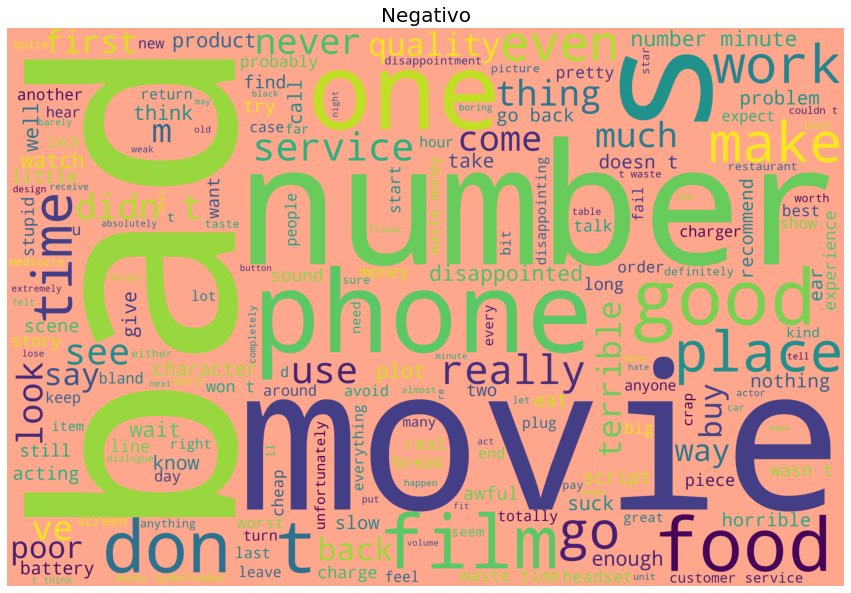

In [601]:
all_neg_words = get_all_words(negativo_cleaned_tokens_list)
show_wordcloud(all_neg_words, "Negativo")